# Pandas对象

## Pandas 的 Series 对象

Pandas 的 Series 对象是一个带索引数据构成的一维数组。可以用一个**数组**创建 Series 对象，如下所示：

In [1]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

通过上面的例子发现 Series 对象将一组数据和一组索引绑定在一起，可以通过 values 属性和 index 属性获取数据。index 属性返回的结果是一个类型为pd.Index 的类数组对象，values 属性返回的结果与NumPy 数组类似。

In [16]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [17]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

和 NumPy 数组一样，数据可以通过 Python 的中括号索引标签获取：

In [18]:
data[1]

0.5

In [20]:
data[1:3]

1    0.50
2    0.75
dtype: float64

NumPy 数组通过隐式定义的整数索引获取数值，而 Pandas 的 Series 对象用一种显式定义的索引与数值关联。显式索引的定义让 Series 对象拥有了更强的能力。例如，索引不再仅仅是整数，还可以是任意想要的类型。如果需要，完全可以用字符串定义索引：

In [21]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [22]:
data['b']

0.5

In [23]:
# 也可以使用不连续或不按顺序的索引：
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

还可以直接用 Python 的**字典**创建一个 Series 对象，用字典创建 Series 对象时，其索引默认按照顺序排列。

In [24]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
# Series 对象
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [25]:
population['California']

38332521

In [26]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

我们已经见过几种创建 Pandas 的 Series 对象的方法，都是像这样的形式：

$$pd.Series(data, index=index)\notag$$

其中，index 是一个可选参数，data 参数支持多种数据类型。

例如，data 可以是列表或 NumPy 数组，这时 index 默认值为整数序列：

In [27]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

data 也可以是一个标量，创建 Series 对象时会重复填充到每个索引上：

In [28]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

data 还可以是一个字典，index 默认是排序的字典键：

In [29]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

每一种形式都可以通过显式指定索引筛选需要的结果：

In [30]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

## Pandas 的 DataFrame 对象

如果将 Series 类比为带灵活索引的一维数组，那么 DataFrame 就可以看作是一种既有灵活的行索引，又有灵活列名的二维数组。就像你可以把二维数组看成是有序排列的一维数组一样，你也可以把 DataFrame 看成是有序排列的若干 Series 对象。这里的“排列”指的是它们拥有共同的索引。

In [34]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [33]:
states = pd.DataFrame({'population': population,'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


和 Series 对象一样，DataFrame 也有一个 index 属性可以获取索引标签：

In [35]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

另外，DataFrame 还有一个 columns 属性，是存放列标签的 Index 对象：

In [36]:
states.columns

Index(['population', 'area'], dtype='object')

因此DataFrame 可以看作一种通用的NumPy 二维数组，它的行与列都可以通过索引获取。

In [37]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [38]:
print(type(states['area']))

<class 'pandas.core.series.Series'>


DataFrame 对象可以通过许多方式创建，这里举几个常用的例子。

- 通过单个 Series 对象创建。DataFrame 是一组 Series 对象的集合，可以用单个 Series创建一个单列的 DataFrame：

In [39]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


- 通过字典列表创建。任何元素是字典的列表都可以变成 DataFrame。用一个简单的列表综合来创建一些数据：

In [40]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


即使字典中有些键不存在，Pandas 也会用缺失值 NaN 来表示：

In [41]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


- 通过 Series 对象字典创建。DataFrame 可以用一个由 Series 对象构成的字典创建：

In [42]:
pd.DataFrame({'population': population,'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


- 通过 NumPy 二维数组创建。假如有一个二维数组，就可以创建一个可以指定行列索引值的 DataFrame。如果不指定行列索引值，那么行列默认都是整数索引值：

In [4]:
import numpy as np
pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c'])

,foo,bar
a,0.557331,0.779488
b,0.333786,0.903079
c,0.167712,0.758348


- 通过 NumPy 结构化数组创建。由于 Pandas 的 DataFrame与结构化数组十分相似，因此可以通过结构化数组创建 DataFrame：

In [45]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

## DataFrame 转换

将Pandas中的DataFrame转换成Numpy中数组三种方法： 

In [47]:
pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c']).values

array([[0.76002871, 0.63644863],
       [0.69842085, 0.94548668],
       [0.62852882, 0.78871412]])

In [48]:
pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c']).as_matrix()

c:\programs\python-3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0.01661622, 0.18654473],
       [0.13609468, 0.34932552],
       [0.15318784, 0.37365857]])

In [49]:
np.array(pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c']))

array([[0.61577687, 0.01620348],
       [0.25944946, 0.67084302],
       [0.33865024, 0.47142627]])

## 对DataFrame 排序

In [52]:
pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['b', 'a', 'c']).sort_index()

,foo,bar
a,0.342747,0.351568
b,0.937293,0.502580
c,0.452510,0.188059


In [54]:
pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c']).sort_values(by="foo")

,foo,bar
c,0.315363,0.48021
a,0.456354,0.19815
b,0.646144,0.16059


# 数据聚合

面对大量的数据时，第一个步骤通常都是计算相关数据的概括统计值。最常用的概括统计值可能是均值和标准差，这两个值能让你分别概括出数据集中的“经典”值，但是其他一些形式的聚合也是非常有用的（如求和、乘积、中位数、最小值和最大值、分位数，等等）。

下图提供了一个NumPy 中可用的聚合函数的清单。

![flow_chart](HW4_1.png)

大多数的聚合都有对 NaN 值的安全处理策略（NaN-safe），即计算时忽略所有的缺失值。

In [72]:
big_array = np.random.rand(1000000)
big_array

array([0.13073622, 0.6731387 , 0.59959097, ..., 0.04275875, 0.87771788,
       0.50653486])

In [73]:
min(big_array), max(big_array)

(3.958909644552477e-09, 0.9999997899162943)

在对较大的数据进行分析时，一项基本的工作就是有效的数据累计（summarization）：计算累计（aggregation）指标，如sum()、mean()、median()、min() 和max()，其中每一个指
标都呈现了大数据集的特征。

In [10]:
# seaborn 行星数据中包含了截至2014 年已被发现的一千多颗外行星的资料。
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [76]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


与一维 NumPy 数组相同，Pandas 的 Series 的累计函数也会返回一个统计值：

In [80]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [81]:
ser.sum()

2.811925491708157

In [82]:
ser.mean()

0.5623850983416314

DataFrame 的累计函数默认对每列进行统计：

In [83]:
df = pd.DataFrame({'A': rng.rand(5),'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [84]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

设置axis 参数，可以对每一行进行统计

In [85]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Pandas 的 Series 和 DataFrame 支持所有 Numpy 中介绍的常用累计函数。另外，还有一个非常方便的 describe() 方法可以计算每一列的若干常用统计值。让我们在行星数据上试验一
下，首先丢弃有缺失值的行：

In [86]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


这是一种理解数据集所有统计属性的有效方法。例如，从年份 year 列中可以看出，1989年首次发现外行星，而且一半的已知外行星都是在 2010 年及以后的年份被发现的。这主要得益于开普勒计划——一个通过激光望远镜发现恒星周围椭圆轨道行星的太空计划。

Pandas 内置的一些累计方法如图所示。

![flow_chart](HW4_2.png)

## GroupBy：分割、应用和组合

简单的累计方法可以让我们对数据集有一个笼统的认识，但是我们经常还需要对某些标签或索引的局部进行累计分析，这时就需要用到 groupby 了。虽然“分组”（group by）这个名字是借用 SQL 数据库语言的命令，但其理念引用发明 R 语言 frame 的 Hadley Wickham 的观点可能更合适：分割（split）、应用（apply）和组合（combine）。

![flow_chart](hw4.png)

- 分割步骤将 DataFrame 按照指定的键分割成若干组。
- 应用步骤对每个组应用函数，通常是累计、转换或过滤函数。
- 组合步骤将每一组的结果合并成一个输出数组。

In [92]:
data=pd.read_csv("hw4_data1.csv",encoding="gbk")
data.head()

,CLASS_ID,STD_ID,SUBJECT,SCORE,LAST_SCORE
0,A1231,1,语文,97,94
1,A1231,1,数学,120,124
2,A1231,1,英语,107,109
3,A1231,1,生物,86,87
4,A1231,1,化学,92,88


假如对于上面的数据我们想要分科目查看平均分

In [93]:
group_sub=data["SCORE"].groupby(data["SUBJECT"])
group_sub

这里的结果只是一个groupby对象，也就是我们指示图中的拆分，想要得到运算结果需要传入想要的函数

In [94]:
group_sub.mean()

SUBJECT
化学     85.00
数学     98.50
物理     82.50
生物     82.50
英语    102.75
语文    100.00
Name: SCORE, dtype: float64

In [95]:
group_sub.sum()

SUBJECT
化学    340
数学    394
物理    330
生物    330
英语    411
语文    400
Name: SCORE, dtype: int64

如果既要分科目也要分班级的话

In [96]:
data["SCORE"].groupby([data["CLASS_ID"],data["SUBJECT"]]).mean()

CLASS_ID  SUBJECT
A1231     化学          80.0
          数学         109.0
          物理          77.0
          生物          82.5
          英语         114.0
          语文         101.5
A1232     化学          90.0
          数学          88.0
          物理          88.0
          生物          82.5
          英语          91.5
          语文          98.5
Name: SCORE, dtype: float64

GroupBy 对象的 aggregate()、filter()、transform() 和 apply() 方法，在数据组合之前实现了大量高效的操作。

In [97]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data1': range(6),'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


**累计**。我们目前比较熟悉的 GroupBy 累计方法只有 sum() 和 median() 之类的简单函数，但是 aggregate() 其实可以支持更复杂的操作，比如字符串、函数或者函数列表，并且能一次性计算所有累计值。

In [98]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

另一种用法就是通过Python 字典指定不同列需要累计的函数：

In [99]:
df.groupby('key').aggregate({'data1': 'min','data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


**过滤**。过滤操作可以让你按照分组的属性丢弃若干数据。例如，我们可能只需要保留标准差超过某个阈值的组：

In [101]:
def filter_func(x):
    return x['data2'].std() > 4
df 

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [102]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [103]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


filter() 函数会返回一个布尔值，表示每个组是否通过过滤。由于 A 组 'data2' 列的标准差不大于4，所以被丢弃了。

**转换**。累计操作返回的是对组内全量数据缩减过的结果，而转换操作会返回一个新的全量数据。数据经过转换之后，其形状与原来的输入数据是一样的。常见的例子就是将每
一组的样本数据减去各组的均值，实现数据标准化：

In [104]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


**apply() 方法**。apply() 方法让你可以在每个组上应用任意方法。这个函数输入一个 DataFrame，返回一个 Pandas 对象（DataFrame 或Series）或一个标量（scalar，单个数值）。组合操作会适应返回结果类型。

In [105]:
# 将第一列数据以第二列的和为基数进行标准化
def norm_by_data2(x):
    # x是一个分组数据的DataFrame
    x['data1'] /= x['data2'].sum()
    return x
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


GroupBy 里的 apply() 方法非常灵活，唯一需要注意的地方是它总是输入分组数据的 DataFrame，返回 Pandas 对象或标量。具体如何选择需要视情况而定。

# KNN Model

In [6]:
data=pd.read_csv("HW4_DATA2.csv",index_col="index")
data

,Sepal.Length,Sepal.Width,Pepal.Length,Pepal.Width,Species
index,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
48,4.6,3.2,1.4,0.2,setosa
49,5.3,3.7,1.5,0.2,setosa
50,5.0,3.3,1.4,0.2,setosa
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor


In [7]:
labels=data.pop("Species")
labels=np.array(labels)
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica'], dtype=object)

In [8]:
#print(type(data.loc[1,:]))
data=np.array(data)
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3]])

In [12]:
from numpy import *
new_t=np.array([6.3,3.1,4.8,1.4])

numSamples = data.shape[0]
diff=tile(new_t,(numSamples,1))-data #重复数组
squreDiff = diff**2
squreDist = sum(squreDiff, axis=1)
distance = squreDist ** 0.5
distance

array([3.82099463, 3.86910842, 4.03236903, 3.90128184, 3.98748041,
       3.7       , 3.83796821, 0.71414284, 0.34641016, 0.6164414 ,
       0.42426407, 2.58843582, 2.72580263])

In [13]:
sortedDistIndices = argsort(distance)
sortedDistIndices

array([ 8, 10,  9,  7, 11, 12,  5,  0,  6,  1,  3,  4,  2], dtype=int64)

In [14]:
classCount = {}
K = 4
for i in range(K):
    voteLabel = labels[sortedDistIndices[i]]
    print(voteLabel)
    classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
print(classCount)

maxCount = 0
for k, v in classCount.items():
    if v > maxCount:
        maxCount = v
        maxIndex = k

print("Your input is:", new_t, "and classified to class: ", maxIndex)

versicolor
versicolor
versicolor
versicolor
{'versicolor': 4}
Your input is: [6.3 3.1 4.8 1.4] and classified to class:  versicolor


# 曼哈顿距离((Manhattan Distance))

$$d(x,y)=\sqrt{\sum\limits_{k=1}^n|x_k-y_k|}$$

In [167]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import math
def Manhattan_Dist(X,Y):
    return math.sqrt(sum([abs(x-y) for (x,y) in zip(X,Y)]))

In [190]:
X=[1,2,3]
Y=[0,1,2]

In [164]:
Manhattan_Dist(X,Y)

1.7320508075688772

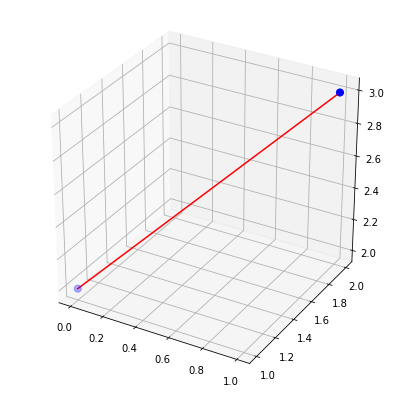

In [170]:
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111,projection='3d')
ax.scatter((X[0],Y[0]),(X[1],Y[1]),(X[2],Y[2]),color='b',s=50)
ax.plot((X[0],Y[0]),(X[1],Y[1]),(X[2],Y[2]),color='r')

# 切比雪夫距离(Chebyshev Distance)

$$d(x,y)=\max\limits_{k=1}^n|x_k-y_k|$$

In [171]:
def Chebyshev_Dist(X,Y):
    return max([abs(x-y) for (x,y) in zip(X,Y)])

In [175]:
Chebyshev_Dist(X,Y)

1

# 闵可夫斯基距离(Minkowski Distance)

$$d(x,y)=\sqrt[p]{\sum\limits_{k=1}^n|x_k-y_k|^p}$$

$p=1：曼哈顿距离\\
p=2：欧式距离\\
p \rightarrow \infty：切比雪夫距离$

In [176]:
def Minkowski_Dist(X, Y, p):
    return (sum([abs(x-y)**p for (x,y) in zip(X,Y)]))**(1/p)

In [177]:
Minkowski_Dist(X, Y, 5)

1.2457309396155174

# 标准化欧式距离(Standardized Euclidean Distance)

$$d(x,y)=\sqrt{\sum\limits_{k=1}^n\begin{pmatrix}\frac{x_k-y_k}{s_k}\end{pmatrix}^2}$$

In [178]:
def Std_Euclidean_Dist(X,Y):
    D=[]
    for index in range(0,len(X)):
        D.append([X[index],Y[index]])
    return math.sqrt(sum([((x-y)/np.var(np.array(d)))**2 for (x,y,d) in zip(X,Y,D)]))

In [179]:
Std_Euclidean_Dist(X,Y)

6.928203230275509

# 马氏距离(Mahalanobis Distance)

$$d(x,y)=\sqrt{(\vec x-\vec y)^TS^{-1}(\vec x-\vec y)}$$

In [225]:
def Mahalanobis_Dist(X,Y):
    V=np.vstack([X,Y])
    VT=V.T
    S=np.cov(V)   #协方差矩阵
    try:
        SI = np.linalg.inv(S) 
        return math.sqrt((X-Y).T*SI*(X-Y))
    except:
        mark=False
        for index in range(0,len(S)):
            if S[index][index]==1:
                mark=True
        if mark:
            return math.sqrt(sum([(x-y)**2 for (x,y) in zip(X,Y)]))
        else: 
            return Std_Euclidean_Dist(X,Y)

In [226]:
Mahalanobis_Dist(X,Y)

1.7320508075688772

In [227]:
M=[3,4,5]
N=[10,8,7]
Mahalanobis_Dist(M,N)

8.306623862918075

[参考资料1](https://www.jianshu.com/p/c30bb865429e)
[参考资料2](https://qinqianshan.com/math/distance/)
[参考资料2](https://www.jianshu.com/p/97c1fae7d7f3?utm_content=note)